In [7]:
import numpy as np
import matplotlib.pyplot as plt 

from numpy.polynomial import Polynomial as P

#### Basics

In [12]:
p = P([1,2,3])

print(p)

p

1.0 + 2.0·x¹ + 3.0·x²


Polynomial([1., 2., 3.], domain=[-1,  1], window=[-1,  1])

In [5]:
xx = np.linspace(-5,5,21)

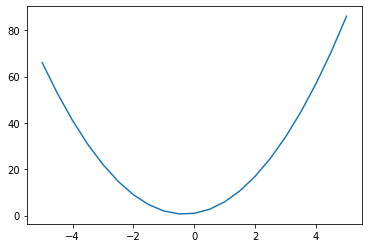

In [8]:
plt.plot(xx, p(xx))

In [14]:
from numpy.polynomial import Chebyshev as T
cheb = p.convert(kind=T)

2.5 + 2.0·T₁(x) + 1.5·T₂(x)


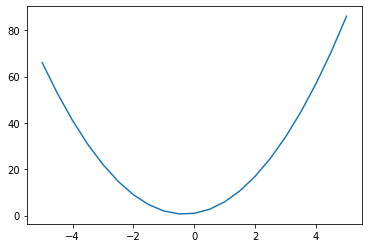

In [16]:
print(cheb)
plt.plot(xx, cheb(xx))

convert를 통해 얻은 Chebyshev는 power series일 때와는 다른 coefficient 값을 가짐. 하지만 evaluation 결과는 동일. 

하지만 Chebyshev polynomial의 기본 domain은 [-1,1]임.  
다른 도메인에 대해서는 domain=[] 옵션을 지정해주어야함 (안그럼 뭐..?) 

In [19]:
print(cheb.domain)
print(cheb.window)

[-1.  1.]
[-1.  1.]


In [20]:
from numpy.polynomial import chebyshev

In [21]:
chebyshev.poly2cheb([1,2,3])

array([2.5, 2. , 1.5])

In [22]:
chebyshev.cheb2poly([1,2,3])

array([-2.,  2.,  6.])

In [24]:
def sigmoid(x):
    return 1./(1.+np.exp(-x))

def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x)+np.exp(-x))

def ReLU(x):
    return x * (x > 0)

def LeakyReLU(x):
    return np.maximum(0.1*x, x)

def _exp(x, a=1):
    return a*(np.exp(x)-1)

def ELU(x, a=1):
    return np.piecewise(x, [x<0, x>=0], [lambda x:_exp(x,a=a), lambda x:x])

def swish(x):
    return x * sigmoid(x)

xx = np.linspace(-37, 30, 1000)
apprx_elu = chebyshev.Chebyshev.fit(xx, ELU(xx), deg=16) # F.elu
apprx_swish = chebyshev.Chebyshev.fit(xx, swish(xx), deg=16) # F.elu 64%

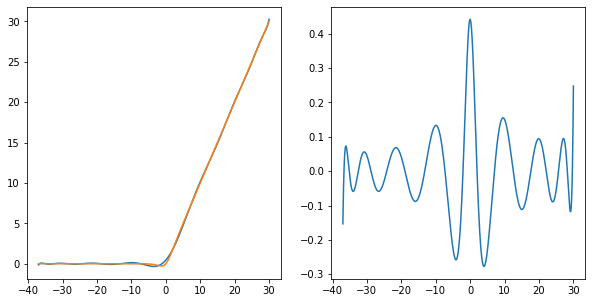

In [31]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].plot(xx, apprx_swish(xx))
axs[0].plot(xx, swish(xx))
axs[1].plot(xx, apprx_swish(xx) - swish(xx))

In [34]:
pp = apprx_swish.convert(kind=P)

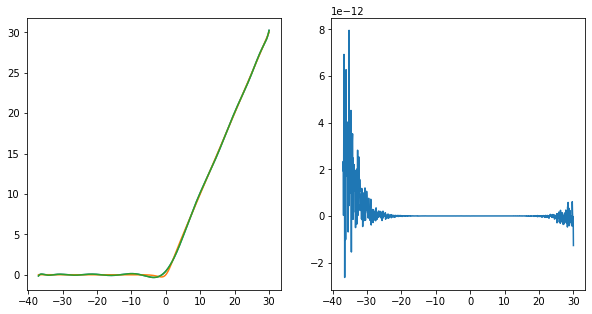

In [38]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].plot(xx, apprx_swish(xx))
axs[0].plot(xx, swish(xx))
axs[0].plot(xx, pp(xx))
axs[1].plot(xx, apprx_swish(xx) - pp(xx))

In [39]:
pp.coef

array([ 4.41417692e-01,  4.92183086e-01,  8.48291825e-02,  4.20268580e-04,
       -5.77558096e-04, -6.09088190e-06,  2.52925949e-06,  3.71993454e-08,
       -6.12368237e-09, -1.13060425e-10,  8.05417868e-12,  1.79979628e-13,
       -5.19719604e-15, -1.43533612e-16,  1.00829089e-18,  4.52243629e-20,
        2.41428374e-22])